In [8]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# 1) Erstellen Sie zuerst zum Testen Ihrer Lösung künstliche Datenwerte für
# zwei Merkmale (Features):
# X soll dabei eine Datenmatrix mit zwei Spalten sein, wobei die Werte zufällig aus
# einer Gleichverteilung (konstante Wahrscheinlichkeitsdichte in einem Intervall) gezogen werden.
import numpy as np
class DataPointGenerator:
    '''
    Data generator which computes new random data points for 2 features
    '''
    features = None
    def __init__(self, amount_of_points) -> None:
        super().__init__()
        scaling_fac = 20
        x1 = np.random.rand(amount_of_points)*scaling_fac
        x2 = np.random.rand(amount_of_points)*scaling_fac
        self.features =  np.array((x1, x2)).reshape((amount_of_points,2))

generator = DataPointGenerator(100)
x = generator.features

In [6]:
# 2) Implementieren Sie die Hypothese (lineares Modell) als Python Funktion:
# linear_hypothesis(theta)
#
# Die Pythonfunktion soll dabei eine Funktion zurückgeben:
# >> theta = np.array([1.1, 2.0, -.9])
# >> h = linear_hypothesis(theta)
# >> print h(X)
# array([ -0.99896965, 20.71147926, ....

def linear_hypothesis(theta):
    def h(x):
        #Add row with ones
        x_temp = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
        return x_temp.dot(theta)
    return h

theta = np.array([1.1, 2.0, -.9])
h = linear_hypothesis(theta)
print(h(np.array(([2, 3], [2, 3]))))

[ 2.4  2.4]


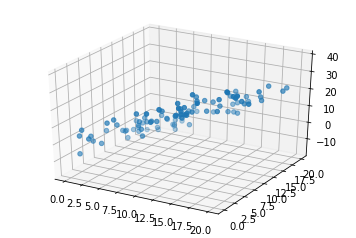

In [9]:
# 3)
# a) Nutzen Sie die Funktion linear_hypothesis(theta) zum Generieren
# künstlicher y-Werte (Zielwerte) für Ihre Merkmalsvektoren (Zeilen von X).
# Addieren Sie zusätzich ein gaussches Rauschen auf die einzelnen y-Werte.

# b) Stellen Sie die X1-X2-Y Werte in einem 3D Plot dar.
# siehe: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

# c) Implementieren Sie das Feature Scaling um neue x' Werte zu berechnen

#Genrate y values with gaussian noise
y = np.random.normal(h(x), 4)

#Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=x[:, 0], ys=x[:, 1], zs=y)
plt.show()

#Feature scaling
def scalingFeature(feature):
    '''
    Scaling a given features to -1 to 1
    :param feature: given features
    :return: scaled features
    '''
    u = np.sum(feature) / feature.size
    std = np.sqrt(np.abs(np.square(u) - np.square(feature)))
    return (feature - u) / std

x[:, 0] = scalingFeature(x[:, 0])
x[:, 1] = scalingFeature(x[:, 1])

In [10]:
# 4) Implementieren Sie die Kostenfunktion J als Python Funktion:
# cost_function(x, y)
# Die Pythonfunktion soll dabei eine Funktion zurückgeben, die
# die denParametervektor theta aufnimmt.
#

def cost_function(x, y):
    '''
    Cost function for multivariate linear function
    :param x: features
    :param y: y values for given features
    :return: costs of the certain values in relation to given theta values
    '''
    def costs(theta):
        curr_hypothesis = linear_hypothesis(theta)
        return 1 / (2*x.shape[0]) * np.sum(np.square(curr_hypothesis(x) - y))
    return costs

print(cost_function(x, y)(theta))

116.182740257


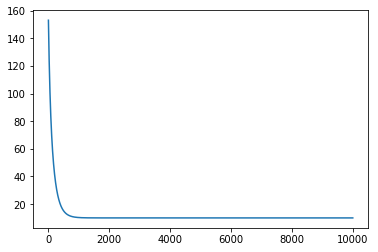

New computed theta values for scaled x values:  [ 10.5294808   20.12176276 -11.09562001]


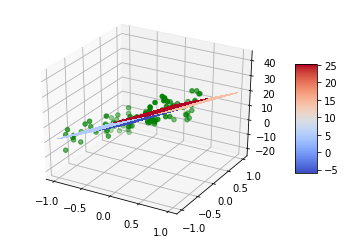

In [12]:
# 5) Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.
# 5a) Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte:
# theta = compute_new_theta(x, y, theta, alpha)
#
# 5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta.
# Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten.
# Kapseln Sie dies in eine Funktion:
# gradient_descent(alpha, theta, nb_iterations, X, y)

# 5c) Plotten Sie den Fortschritt (Verringerung der Kosten über den Iterationen) für 5b

# 6) Stellen Sie die gefundene Hyperebene in einem 3D Plot zusammen mit den Daten dar

def compute_new_theta(x, y, theta, alpha):
    '''
    Compute new theta values for multivariate linear regression with gradient descent
    :param x: features
    :param y: y values for given feature values
    :param theta: array with theta values
    :param alpha: learning rate
    :return:
    '''
    hypothesis = linear_hypothesis(theta)
    x_temp = np.concatenate((np.ones((x.shape[0], 1)), x), axis=1)
    return theta - alpha * (1.0 / x_temp.shape[0]) * x_temp.T.dot(hypothesis(x) - y)

def plot_costs(nb_iterations, costs):
    '''
    Simply plot some given costs in relation to iteration
    :param nb_iterations: number of iterations
    :param costs: costs for each iteration
    '''
    plt.plot(np.arange(0, nb_iterations, 1), costs)
    plt.show()

def gradient_descent(alpha, theta, nb_iterations, x, y):
    '''
    Gradient descent for multivariate linear regression
    :param alpha: learning rate
    :param theta: array with theta values
    :param nb_iterations: number of iterations the gradient descent should do
    :param x: features
    :param y: y values
    :return: new computed theta values
    '''
    n_theta = theta
    costs = []
    for i in range(nb_iterations):
        n_theta = compute_new_theta(x, y, n_theta, alpha)
        costs.append(cost_function(x, y)(n_theta))
    plot_costs(nb_iterations, costs)
    return n_theta

#Learning rate 1%
#Iterations: 10.000
alpha = 0.01
theta_new = gradient_descent(alpha, np.array((2, 4, 10)), 10000, x, y)
print("New computed theta values for scaled x values: ", theta_new)


#See this for reference --> https://matplotlib.org/examples/mplot3d/surface3d_demo.html
# plot the surface
x1 = np.arange(-1, 2, 1)
x2 = np.arange(-1, 2, 1)
x1, x2 = np.meshgrid(x1, x2)
y_computed = theta_new[0] + theta_new[1] * x1 + theta_new[2] * x2
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
surf = ax.plot_surface(x1, x2, y_computed, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.scatter(x[:, 0], x[:, 1], y, color='green')
plt.show()